## Load Libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
df = pd.read_csv('../data/kaggle_survey_2017_2021.csv.zip', header=[0, 1])

/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_47959/1276501630.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

## 0: Understanding the survey

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106301 entries, 0 to 106300
Columns: 293 entries, ('-', 'Year') to ('Q38_B_OTHER', 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other')
dtypes: float64(1), int64(1), object(291)
memory usage: 237.6+ MB


In [4]:
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
q_num_to_questions_dict = dict(df.columns)
q_num_to_questions_dict

{'-': 'Year',
 'Time from Start to Finish (seconds)': 'Duration (in seconds)',
 'Q1': 'What is your age (# years)?',
 'Q2': 'What is your gender? - Selected Choice',
 'Q3': 'In which country do you currently reside?',
 'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q5': 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Q6': 'For how many years have you been writing code and/or programming?',
 'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - S

Understanding the survey findings:
1. There are 42 questions in the questionaire.
2. Some questions have multiple options to choose from. (Select all that apply)
3. Some questions have single option to choose from. (Choose one from the list)

In [82]:
# how many questions are asked:
question_to_response_and_topic = {}
for question_num_str, question in q_num_to_questions_dict.items():
    # group Q12new as part of Q12, edge case
    question_num = question_num_str.split('_')[0].replace('Q', '').replace('new', '')
    if question_num not in question_to_response_and_topic:
        question_to_response_and_topic[question_num] = {'max_response_count': 1, 'multiple_options_selectable': 0}
    else:
        question_to_response_and_topic[question_num]['max_response_count'] += 1
        
    if '(Select all that apply)' in question:
        question_to_response_and_topic[question_num]['multiple_options_selectable'] = 1
        choice = question.split('Selected Choice - ')[-1].strip()
        if 'choices' in question_to_response_and_topic[question_num]:
            question_to_response_and_topic[question_num]['choices'] += [choice]
        else:
            question_to_response_and_topic[question_num]['choices'] = [choice]
    question_str = question.split('(Select all that apply)')[0].strip()
    if 'question' not in question_to_response_and_topic[question_num]:
            question_to_response_and_topic[question_num]['question'] = question_str
    if 'columns' not in question_to_response_and_topic[question_num]:
        question_to_response_and_topic[question_num]['columns'] = [question_num_str]
    else:
        question_to_response_and_topic[question_num]['columns'] += [question_num_str]

In [87]:
questionnaire = pd.DataFrame(question_to_response_and_topic).T
questionnaire = questionnaire.sort_values(by='max_response_count', ascending=False).reset_index().rename({'index':'Q'}, axis=1)
# Display the DataFrame with expanded column width
pd.set_option('display.max_colwidth', None)
questionnaire

,Q,max_response_count,multiple_options_selectable,question,columns,choices
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other, MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]"
1,34,28,1,Which of the following business intelligence tools do you use on a regular basis?,"[Q34_A_Part_1, Q34_A_Part_2, Q34_A_Part_3, Q34_A_Part_4, Q34_A_Part_5, Q34_A_Part_6, Q34_A_Part_8, Q34_A_Part_9, Q34_A_Part_10, Q34_A_Part_11, Q34_A_Part_12, Q34_A_Part_13, Q34_A_Part_16, Q34_A_OTHER, Q34_B_Part_1, Q34_B_Part_2, Q34_B_Part_3, Q34_B_Part_4, Q34_B_Part_5, Q34_B_Part_6, Q34_B_Part_8, Q34_B_Part_9, Q34_B_Part_10, Q34_B_Part_11, Q34_B_Part_12, Q34_B_Part_13, Q34_B_Part_16, Q34_B_OTHER]","[Amazon QuickSight, Microsoft Power BI, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other, Microsoft Power BI, Amazon QuickSight, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other]"
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]"
3,38,20,1,Do you use any tools to help manage machine learning experiments?,"[Q38_A_Part_1, Q38_A_Part_2, Q38_A_Part_3, Q38_A_Part_4, Q38_A_Part_5, Q38_A_Part_6, Q38_A_Part_7, Q38_A_Part_9, Q38_A_Part_11, Q38_A_OTHER, Q38_B_Part_1, Q38_B_Part_2, Q38_B_Part_3, Q38_B_Part_4, Q38_B_Part_5, Q38_B_Part_6, Q38_B_Part_7, Q38_B_Part_9, Q38_B_Part_11, Q38_B_OTHER]","[Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, No / None, Other, Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, None, Other]"
4,36,16,1,Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?,"[Q36_A_Part_1, Q36_A_Part_2, Q36_A_Part_3, Q36_A_Part_4, Q36_A_Part_5, Q36_A_Part_6, Q36_A_Part_7, Q36_A_OTHER, Q36_B_Part_1, Q36_B_Part_2, Q36_B_Part_3, Q36_B_Part_4, Q36_B_Part_5, Q36_B_Part_6, Q36_B_Part_7, Q36_B_OTHER]","[Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, boruta_py), Automated model selection (e.g. auto-sklearn, xcessiv), Automated model architecture searches (e.g. darts, enas), Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier), Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI), No / None, Other, Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, borut

## 0.1 : Grouping Survey Topic for a systematic understanding

In [90]:
# we want to further group the questions into similar topic.
# a json of the question groupings that we will perform the exploration of data in
questions_grouping = {
  "Data Infrastructure and Tools": [
    "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?",
    "Which of the following business intelligence tools do you use on a regular basis?",
    "Which of the following cloud computing platforms do you use on a regular basis?",
    "Which of the following hosted notebook products do you use on a regular basis?",
    "What programming languages do you use on a regular basis?",
    "What data visualization libraries or tools do you use on a regular basis?",
    "What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice",
    "What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice",
    "Which of the following business intelligence tools do you use most often? - Selected Choice",
    "Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice",
    "What type of computing platform do you use most often for your data science projects? - Selected Choice"
  ],
  "Machine Learning and AI Tools": [
    "Do you use any tools to help manage machine learning experiments?",
    "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?",
    "Which of the following machine learning frameworks do you use on a regular basis?",
    "Which of the following ML algorithms do you use on a regular basis?",
    "Which categories of computer vision methods do you use on a regular basis?",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Which types of specialized hardware do you use on a regular basis?",
    "Do you use any of the following managed machine learning products on a regular basis?",
    "Approximately how many times have you used a TPU (tensor processing unit)?",
    "For how many years have you used machine learning methods?"
  ],
  "Demographics and Work Information": [
    "What is your age (# years)?",
    "What is your gender? - Selected Choice",
    "In which country do you currently reside?",
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?",
    "Select the title most similar to your current role (or most recent title if retired): - Selected Choice",
    "For how many years have you been writing code and/or programming?",
    "Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?",
    "What is your current yearly compensation (approximate $USD)?",
    "Does your current employer incorporate machine learning methods into their business?",
    "Approximately how many individuals are responsible for data science workloads at your place of business?",
    "What is the size of the company where you are employed?",
    "In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice"
  ],
  "Other": [
    "Who/what are your favorite media sources that report on data science topics?",
    "On which platforms have you begun or completed data science courses?",
    "Duration (in seconds)",
    "Year"
  ],
  "Role and Responsibilities": [
    "Select any activities that make up an important part of your role at work:"
  ]
}
for group_name, list_of_questions in questions_grouping.items():
    questionnaire.loc[questionnaire['question'].isin(list_of_questions), 'question_group'] = group_name

In [91]:
questionnaire

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other, MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]",Data Infrastructure and Tools
1,34,28,1,Which of the following business intelligence tools do you use on a regular basis?,"[Q34_A_Part_1, Q34_A_Part_2, Q34_A_Part_3, Q34_A_Part_4, Q34_A_Part_5, Q34_A_Part_6, Q34_A_Part_8, Q34_A_Part_9, Q34_A_Part_10, Q34_A_Part_11, Q34_A_Part_12, Q34_A_Part_13, Q34_A_Part_16, Q34_A_OTHER, Q34_B_Part_1, Q34_B_Part_2, Q34_B_Part_3, Q34_B_Part_4, Q34_B_Part_5, Q34_B_Part_6, Q34_B_Part_8, Q34_B_Part_9, Q34_B_Part_10, Q34_B_Part_11, Q34_B_Part_12, Q34_B_Part_13, Q34_B_Part_16, Q34_B_OTHER]","[Amazon QuickSight, Microsoft Power BI, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other, Microsoft Power BI, Amazon QuickSight, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other]",Data Infrastructure and Tools
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]",Data Infrastructure and Tools
3,38,20,1,Do you use any tools to help manage machine learning experiments?,"[Q38_A_Part_1, Q38_A_Part_2, Q38_A_Part_3, Q38_A_Part_4, Q38_A_Part_5, Q38_A_Part_6, Q38_A_Part_7, Q38_A_Part_9, Q38_A_Part_11, Q38_A_OTHER, Q38_B_Part_1, Q38_B_Part_2, Q38_B_Part_3, Q38_B_Part_4, Q38_B_Part_5, Q38_B_Part_6, Q38_B_Part_7, Q38_B_Part_9, Q38_B_Part_11, Q38_B_OTHER]","[Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, No / None, Other, Neptune.ai, Weights & Biases, Comet.ml, Sacred + Omniboard, TensorBoard, Guild.ai, Polyaxon, Domino Model Monitor, None, Other]",Machine Learning and AI Tools
4,36,16,1,Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?,"[Q36_A_Part_1, Q36_A_Part_2, Q36_A_Part_3, Q36_A_Part_4, Q36_A_Part_5, Q36_A_Part_6, Q36_A_Part_7, Q36_A_OTHER, Q36_B_Part_1, Q36_B_Part_2, Q36_B_Part_3, Q36_B_Part_4, Q36_B_Part_5, Q36_B_Part_6, Q36_B_Part_7, Q36_B_OTHER]","[Automated data augmentation (e.g. imgaug, albumentations), Automated feature engineering/selection (e.g. tpot, boruta_py), Automated model selection (e.g. auto-sklearn, xcessiv), Automated model architecture searches (e.g. darts, enas), Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier), Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI),

In [10]:
def filter_column_data_with_question_num(question_num):
    return df[question_to_response_and_topic[str(question_num)]['columns']]

## Topic 1: Demographics and Work Information

In [11]:
questionnaire[questionnaire['question_group'] == 'Demographics and Work Information']

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
22,1,1,0,What is your age (# years)?,[Q1],NaN,Demographics and Work Information
23,2,1,0,What is your gender? - Selected Choice,[Q2],NaN,Demographics and Work Information
24,3,1,0,In which country do you currently reside?,[Q3],NaN,Demographics and Work Information
25,4,1,0,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,[Q4],NaN,Demographics and Work Information
26,5,1,0,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,[Q5],NaN,Demographics and Work Information
28,6,1,0,For how many years have you been writing code and/or programming?,[Q6],NaN,Demographics and Work Information
33,26,1,0,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?,[Q26],NaN,Demographics and Work Information
34,25,1,0,What is your current yearly compensation (approximate $USD)?,[Q25],NaN,Demographics and Work Information
35,23,1,0,Does your current employer incorporate machine learning methods into their business?,[Q23],NaN,Demographics and Work Information
36,22,1,0,Approximately how many individuals are responsible for data science workloads at your place of business?,[Q22],NaN,Demographics and Work Information


In [12]:
column_list = questionnaire[questionnaire['question_group'] == 'Demographics and Work Information']['columns'].to_list()
c_list = []
for each in column_list:
    c_list += each

In [13]:
topic_1_df = df.loc[:, c_list]
topic_1_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q26,Q25,Q23,Q22,Q21,Q20
,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?,What is your current yearly compensation (approximate $USD)?,Does your current employer incorporate machine learning methods into their business?,Approximately how many individuals are responsible for data science workloads at your place of business?,What is the size of the company where you are employed?,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice
0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,$100-$999,"25,000-29,999",No (we do not use ML methods),4-Mar,50-249 employees,Manufacturing/Fabrication
1,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,$0 ($USD),"60,000-69,999",We are exploring ML methods (and may one day put a model into production),2-Jan,"1000-9,999 employees",Manufacturing/Fabrication
2,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,$0 ($USD),$0-999,I do not know,0,"1000-9,999 employees",Academics/Education
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,$0 ($USD),"30,000-39,999",I do not know,0,"1000-9,999 employees",Academics/Education
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"$1000-$9,999","30,000-39,999",We use ML methods for generating insights (but do not put working models into production),9-May,50-249 employees,Academics/Education
...,...,...,...,...,...,...,...,...,...,...,...,...
106296,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,NaN,NaN,NaN,NaN
106297,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,NaN,NaN,NaN,NaN
106298,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Global Distribution: Country of residence of the survey participant (Q3)

In [14]:
country_counts = filter_column_data_with_question_num(3).value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts

,Country,Count
0,India,25192
1,United States of America,12688
2,Other,5771
3,United States,4197
4,China,3506
...,...,...
72,Ecuador,50
73,Uganda,47
74,Kazakhstan,45
75,Iraq,43


- 77 Countries participated in this survey.
- India has the highest number of participant

In [15]:
country_counts

,Country,Count
0,India,25192
1,United States of America,12688
2,Other,5771
3,United States,4197
4,China,3506
...,...,...
72,Ecuador,50
73,Uganda,47
74,Kazakhstan,45
75,Iraq,43


In [16]:
country_counts['Country'].to_list()

['India',
 'United States of America',
 'Other',
 'United States',
 'China',
 'Russia',
 'Brazil',
 'Japan',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'France',
 'Canada',
 'Spain',
 'Nigeria',
 'Turkey',
 'Australia',
 'Italy',
 'Pakistan',
 'Indonesia',
 'Taiwan',
 'South Korea',
 'Poland',
 'Mexico',
 'Ukraine',
 'Egypt',
 'Netherlands',
 'Singapore',
 'Colombia',
 'Bangladesh',
 'Viet Nam',
 'South Africa',
 'Kenya',
 'Argentina',
 'Israel',
 'Portugal',
 'Iran, Islamic Republic of...',
 'Malaysia',
 'United Kingdom',
 'Switzerland',
 'Greece',
 'Sweden',
 "People 's Republic of China",
 'Morocco',
 'I do not wish to disclose my location',
 'Philippines',
 'Ireland',
 'Chile',
 'Belgium',
 'Thailand',
 'Peru',
 'Tunisia',
 'Belarus',
 'Romania',
 'Denmark',
 'Czech Republic',
 'Norway',
 'Republic of Korea',
 'Hong Kong (S.A.R.)',
 'Saudi Arabia',
 'Hungary',
 'New Zealand',
 'Sri Lanka',
 'United Arab Emirates',
 'Austria',
 'Ghana',
 'Finland',
 'Nepal

In [17]:
undisclosed_location_participants = country_counts[country_counts['Country'] ==  'I do not wish to disclose my location']
undisclosed_location_participants

,Country,Count
43,I do not wish to disclose my location,463


In [18]:
print(f"{round(463/df.shape[0] * 100, 2)} % of participants did not disclose their locations")

0.44 % of participants did not disclose their locations


In [19]:
top_countries = country_counts.head(20)

fig = px.scatter_geo(top_countries, locations="Country", locationmode='country names', color="Count",
                     hover_name="Country", size="Count", projection="natural earth",
                     title='Top 20 Countries of Survey Participants', opacity=0.7,
                     template="plotly", size_max=80)
fig.show()

In [20]:
country_counts.columns = ['Country', 'Count']
bottom_20 = country_counts.tail(20)

fig = px.scatter_geo(bottom_20, locations="Country", locationmode='country names', color="Count",
                     hover_name="Country", size="Count", projection="natural earth",
                     title='Bottom 20 Countries of Survey Participants', opacity=0.7,
                     template="plotly", size_max=50)
fig.show()

As I want to understand the survey distribution by regions as well, I have gathered the country to region data from the United Nations website.
https://unstats.un.org/unsd/methodology/m49/overview/

In [21]:
country_regions = pd.read_csv('../data/UNSD — Methodology.csv', sep=';')
country_regions

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x


In [22]:
country_regions = country_regions[['Region Name', 'Country or Area']]
country_regions = country_regions.rename({'Country or Area':'Country'},axis=1)
country_regions

,Region Name,Country
0,Africa,Algeria
1,Africa,Egypt
2,Africa,Libya
3,Africa,Morocco
4,Africa,Sudan
...,...,...
243,Oceania,Samoa
244,Oceania,Tokelau
245,Oceania,Tonga
246,Oceania,Tuvalu


In [23]:
country_counts = country_counts.merge(country_regions, on='Country', how='left')
country_counts

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,NaN
3,United States,4197,NaN
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


In [24]:
country_counts[country_counts['Region Name'].isna() == True]

,Country,Count,Region Name
2,Other,5771,NaN
3,United States,4197,NaN
5,Russia,3407,NaN
14,Turkey,1519,NaN
19,Taiwan,1156,NaN
20,South Korea,1113,NaN
25,Netherlands,940,NaN
35,"Iran, Islamic Republic of...",566,NaN
37,United Kingdom,535,NaN
41,People 's Republic of China,471,NaN


After checking into the UN dataset of country name, they seem to have longer name compared to our list of countries. For example: 'Russia' in our dataset is saved as 'Russian Federation' in their dataset. We will try to fix this by string matching.

In [25]:
for idx, row in country_counts[country_counts['Region Name'].isna() == True].iterrows():
    if row['Country'] not in ['Other', 'I do not wish to disclose my location']:
        possible_match = country_regions[country_regions['Country'].str.contains(row['Country'], case=False)]
        if possible_match.shape[0] == 1:
            print(f"{row['Country']} : {possible_match['Region Name']}")
            country_counts.at[idx, 'Region Name'] = possible_match['Region Name'].item()
        elif possible_match.shape[0] == 0:
            print(f"{row['Country']} has no match")
            print('')

Russia : 175    Europe
Name: Region Name, dtype: object
Turkey has no match

Taiwan has no match

South Korea has no match

Netherlands : 217    Europe
Name: Region Name, dtype: object
Iran, Islamic Republic of... has no match

United Kingdom : 193    Europe
Name: Region Name, dtype: object
People 's Republic of China has no match

Czech Republic has no match

Hong Kong (S.A.R.) has no match

Iran : 145    Asia
Name: Region Name, dtype: object
Vietnam has no match

Republic of China has no match

Hong Kong : 124    Asia
Name: Region Name, dtype: object


/var/folders/yh/3lw9v_4j47n0g153j2hrjykc0000gn/T/ipykernel_47959/1146718691.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Not all of them as fixed. We will have to manually assign them for now.

In [26]:
country_counts[country_counts['Region Name'].isna() == True]

,Country,Count,Region Name
2,Other,5771,NaN
3,United States,4197,NaN
14,Turkey,1519,NaN
19,Taiwan,1156,NaN
20,South Korea,1113,NaN
35,"Iran, Islamic Republic of...",566,NaN
41,People 's Republic of China,471,NaN
43,I do not wish to disclose my location,463,NaN
54,Czech Republic,246,NaN
57,Hong Kong (S.A.R.),219,NaN


In [27]:
country_counts.loc[country_counts['Country'] =='Other', 'Region Name'] = 'Other'
country_counts.loc[country_counts['Country'] == 'United States', 'Region Name'] = 'Americas'
country_counts.loc[country_counts['Country'] =='Turkey', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Taiwan', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] == 'South Korea', 'Region Name'] = 'Asia'
country_counts.at[35, 'Region Name'] = 'Asia' # Iran, Islamic Republic of
country_counts.loc[country_counts['Country'] =="People 's Republic of China", 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='I do not wish to disclose my location', 'Region Name'] = 'Other'
country_counts.loc[country_counts['Country'] =='Czech Republic', 'Region Name'] = 'Europe'
country_counts.loc[country_counts['Country'] =='Hong Kong (S.A.R.)', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Vietnam', 'Region Name'] = 'Asia'
country_counts.loc[country_counts['Country'] =='Republic of China', 'Region Name'] = 'Asia'

In [28]:
country_counts.isna().value_counts()

Country  Count  Region Name
False    False  False          77
dtype: int64

Now that all regions have been filled up, we will check on distribution by regions.

In [29]:
country_counts

,Country,Count,Region Name
0,India,25192,Asia
1,United States of America,12688,Americas
2,Other,5771,Other
3,United States,4197,Americas
4,China,3506,Asia
...,...,...,...
72,Ecuador,50,Americas
73,Uganda,47,Africa
74,Kazakhstan,45,Asia
75,Iraq,43,Asia


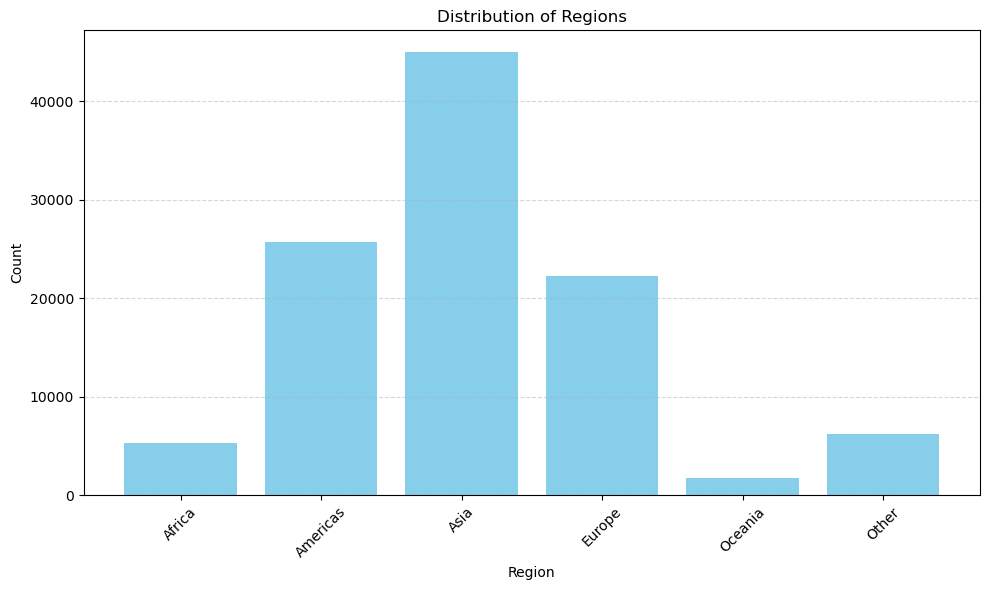

In [30]:
# Group by region and sum the counts
region_counts = country_counts.groupby('Region Name')['Count'].sum().reset_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_counts['Region Name'], region_counts['Count'], color='skyblue')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Asia, America and Europe has the top 3 highest overall responses.

#### 2. Year (-)

In [31]:
df[question_to_response_and_topic['-']['columns']].value_counts().reset_index()

,"(-, Year)",0
0,2021,25973
1,2018,23859
2,2020,20036
3,2019,19717
4,2017,16716


In [32]:
df[question_to_response_and_topic['-']['columns']].value_counts().reset_index().describe()

,"(-, Year)",0
count,5.000000,5.000000
mean,2019.000000,21260.200000
std,1.581139,3656.984099
min,2017.000000,16716.000000
25%,2018.000000,19717.000000
50%,2019.000000,20036.000000
75%,2020.000000,23859.000000
max,2021.000000,25973.000000


Responses are fron year 2017 to 2021 with an average of 21260 responses per year.

### 3. Demographic

##### 3.1 Age (Q1)

In [33]:
age_counts = filter_column_data_with_question_num(1).value_counts().reset_index()
age_counts.columns = ['Age Group', 'Count']
age_counts

,Age Group,Count
0,25-29,23748
1,22-24,19662
2,30-34,16144
3,18-21,15159
4,35-39,10868
5,40-44,7327
6,45-49,4996
7,50-54,3514
8,55-59,2112
9,60-69,1851


In [34]:
# sort from youngest to oldest
age_mapping = {
    '18-21': 1,
    '22-24': 2,
    '25-29': 3,
    '30-34': 4,
    '35-39': 5,
    '40-44': 6,
    '45-49': 7,
    '50-54': 8,
    '55-59': 9,
    '60-69': 10,
    '70+': 11
}
# Convert age groups to numerical values
age_counts['Age Order'] = age_counts['Age Group'].map(age_mapping)
age_counts

,Age Group,Count,Age Order
0,25-29,23748,3
1,22-24,19662,2
2,30-34,16144,4
3,18-21,15159,1
4,35-39,10868,5
5,40-44,7327,6
6,45-49,4996,7
7,50-54,3514,8
8,55-59,2112,9
9,60-69,1851,10


In [35]:
# Sort the DataFrame based on age order
df_sorted = age_counts.sort_values(by='Age Order')
df_sorted

,Age Group,Count,Age Order
3,18-21,15159,1
1,22-24,19662,2
0,25-29,23748,3
2,30-34,16144,4
4,35-39,10868,5
5,40-44,7327,6
6,45-49,4996,7
7,50-54,3514,8
8,55-59,2112,9
9,60-69,1851,10


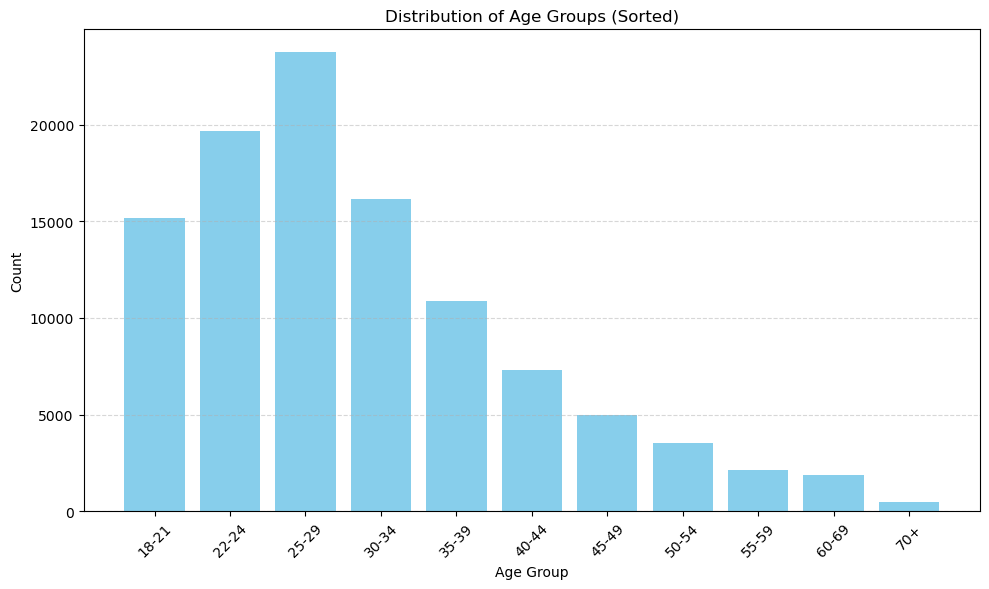

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Age Group'], df_sorted['Count'], color='skyblue')
plt.title('Distribution of Age Groups (Sorted)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 25-29 age group has the highest frequency.
- Age range starts from 18 to 70+.

##### 3.2 Gender (Q2)

In [37]:
gender_counts = filter_column_data_with_question_num(2).value_counts().reset_index()
gender_counts.columns = ['Gender Group', 'Count']
gender_counts

,Gender Group,Count
0,Male,49178
1,Man,36387
2,Female,10000
3,Woman,8768
4,Prefer not to say,1276
5,Prefer to self-describe,224
6,A different identity,159
7,Nonbinary,140
8,"Non-binary, genderqueer, or gender non-conforming",74


- Two labels : Male and Man can be under one group, Female and Woman can be under one group.

In [38]:
def group_and_sum_gender(keep_label, remove_label, gender_counts):
    grouped_sum = gender_counts[gender_counts['Gender Group'].isin([keep_label, remove_label])]['Count'].sum()
    gender_counts.loc[gender_counts['Gender Group'] == keep_label, 'Count'] = grouped_sum
    gender_counts = gender_counts[gender_counts['Gender Group'] != remove_label]
    return gender_counts
gender_counts = group_and_sum_gender("Male", "Man", gender_counts)
gender_counts = group_and_sum_gender("Female", "Woman", gender_counts)
gender_counts = group_and_sum_gender("Non-binary, genderqueer, or gender non-conforming", "Nonbinary", gender_counts)

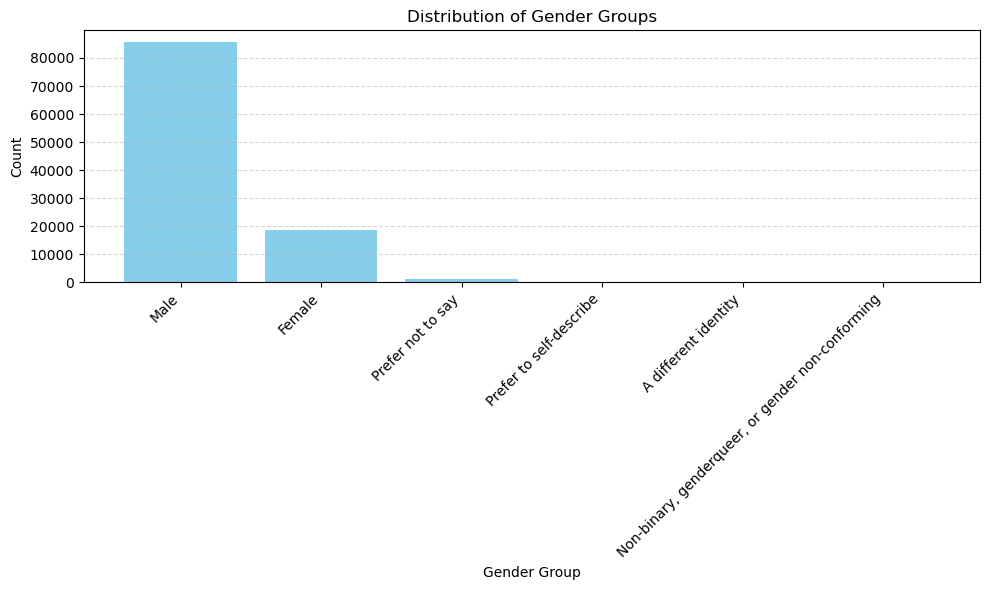

In [39]:
# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(gender_counts['Gender Group'], gender_counts['Count'], color='skyblue')
plt.title('Distribution of Gender Groups')
plt.xlabel('Gender Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Education: highest of formal education that you have attained or plan to attain within the next 2 years (Q4)

In [40]:
education_counts = filter_column_data_with_question_num(4).value_counts().reset_index()
education_counts.columns = ['Education', 'Count']
education_counts.sort_values(by='Count', ascending=False)
education_counts

,Education,Count
0,Masterâ€™s degree,37395
1,Bachelorâ€™s degree,29961
2,Doctoral degree,13568
3,Master's degree,6273
4,Bachelor's degree,4811
5,Some college/university study without earning a bachelorâ€™s degree,4631
6,Professional degree,2360
7,I prefer not to answer,1794
8,No formal education past high school,1122
9,Some college/university study without earning a bachelor's degree,786


In [41]:
education_counts['Education'].to_list()

['Masterâ€™s degree',
 'Bachelorâ€™s degree',
 'Doctoral degree',
 "Master's degree",
 "Bachelor's degree",
 'Some college/university study without earning a bachelorâ€™s degree',
 'Professional degree',
 'I prefer not to answer',
 'No formal education past high school',
 "Some college/university study without earning a bachelor's degree",
 'Professional doctorate',
 'I did not complete any formal education past high school']

- There seems to be encoding issue for some:
    - Masters degree and showing `Master's degree` and `Masterâ€™s degree` as two separate rows.
    - Masters degree and showing `Bachelor's degree` and `Bachelorâ€™s degree` as two separate rows.
    - `No formal education past high school` and `I did not complete any formal education past high school` are also the same.
    - `Some college/university study without earning a bachelorâ€™s degree` and `Some college/university study without earning a bachelor's degree`
- We can combine them to have a more accurate analysis.

In [42]:
def group_and_sum(keep_label, remove_label, education_counts):
    grouped_sum = education_counts[education_counts['Education'].isin([keep_label, remove_label])]['Count'].sum()
    education_counts.loc[education_counts['Education'] == keep_label, 'Count'] = grouped_sum
    education_counts = education_counts[education_counts['Education'] != remove_label]
    return education_counts


In [43]:
education_counts = group_and_sum("Master's degree", "Masterâ€™s degree", education_counts)
education_counts = group_and_sum("Bachelor's degree", "Bachelorâ€™s degree", education_counts)
education_counts = group_and_sum("No formal education past high school", "I did not complete any formal education past high school", education_counts)
education_counts = group_and_sum("Some college/university study without earning a bachelor's degree", "Some college/university study without earning a bachelorâ€™s degree", education_counts)
# Calculate the total count of all rows in the 'Count' column
total_count = education_counts['Count'].sum()
# Compute the percentage for each row
education_counts['Percentage'] = round((education_counts['Count'] / total_count) * 100, 2)
education_counts = education_counts.reset_index(drop=True)
education_counts

,Education,Count,Percentage
0,Doctoral degree,13568,13.13
1,Master's degree,43668,42.27
2,Bachelor's degree,34772,33.66
3,Professional degree,2360,2.28
4,I prefer not to answer,1794,1.74
5,No formal education past high school,1379,1.33
6,Some college/university study without earning a bachelor's degree,5417,5.24
7,Professional doctorate,360,0.35


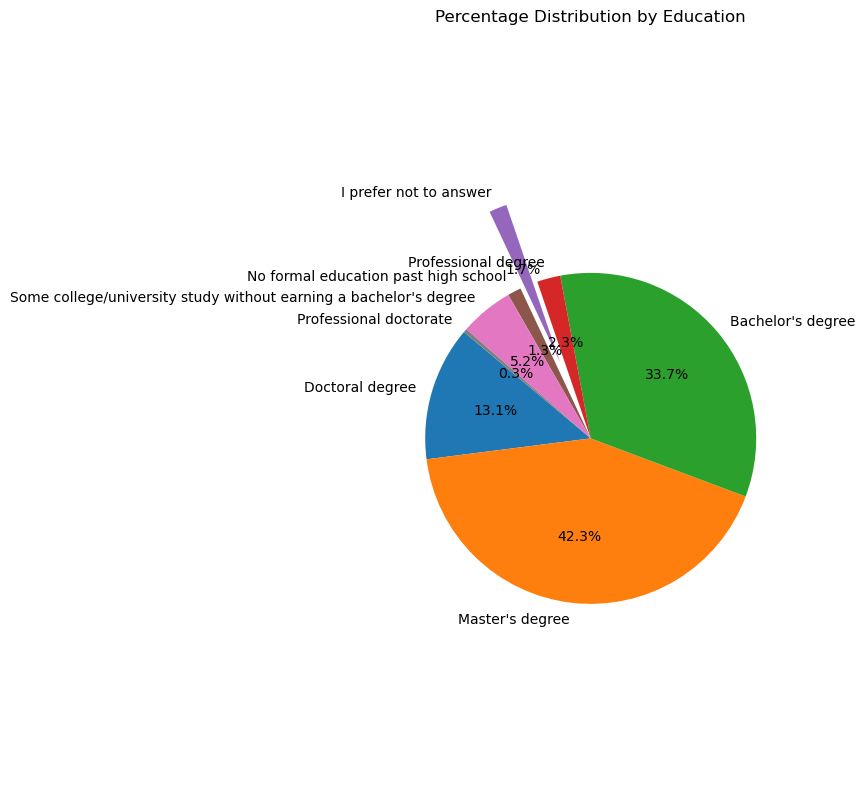

In [44]:
# Explode the slices for better readability
explode = (0.0, 0.0, 0.0, 0.0, 0.5, 0, 0, 0)
# Plotting the pie chart with exploded slices and adjusted font size
plt.figure(figsize=(8, 8))
plt.pie(education_counts['Percentage'], labels=education_counts['Education'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Percentage Distribution by Education')
plt.axis('equal')
plt.tight_layout()
plt.show()

Top 3 desired education:
1. Master's Degree
2. Bachelor's Degree
3. Doctoral Degree

Only 1.74 % of the people do not answer so it does not seem to hugely impact our analysis

## Topic 2: Data Infrastructure and Tools

In [81]:
questionnaire[questionnaire['question_group'] == 'Data Infrastructure and Tools']

,Q,max_response_count,multiple_options_selectable,question,columns,choices,question_group
0,32,30,1,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?","[Q32_A_Part_1, Q32_A_Part_2, Q32_A_Part_3, Q32_A_Part_4, Q32_A_Part_5, Q32_A_Part_6, Q32_A_Part_7, Q32_A_Part_8, Q32_A_Part_11, Q32_A_Part_14, Q32_A_Part_15, Q32_A_Part_16, Q32_A_Part_17, Q32_A_Part_20, Q32_A_OTHER, Q32_B_Part_1, Q32_B_Part_2, Q32_B_Part_3, Q32_B_Part_4, Q32_B_Part_5, Q32_B_Part_6, Q32_B_Part_7, Q32_B_Part_8, Q32_B_Part_11, Q32_B_Part_13, Q32_B_Part_15, Q32_B_Part_16, Q32_B_Part_17, Q32_B_Part_20, Q32_B_OTHER]","[MySQL, PostgreSQL, SQLite, Oracle Database, MongoDB, Snowflake, IBM Db2, Microsoft SQL Server, Amazon Redshift, Amazon DynamoDB, Google Cloud BigQuery, Google Cloud SQL, Google Cloud Firestore, None, Other]",Data Infrastructure and Tools
1,34,28,1,Which of the following business intelligence tools do you use on a regular basis?,"[Q34_A_Part_1, Q34_A_Part_2, Q34_A_Part_3, Q34_A_Part_4, Q34_A_Part_5, Q34_A_Part_6, Q34_A_Part_8, Q34_A_Part_9, Q34_A_Part_10, Q34_A_Part_11, Q34_A_Part_12, Q34_A_Part_13, Q34_A_Part_16, Q34_A_OTHER, Q34_B_Part_1, Q34_B_Part_2, Q34_B_Part_3, Q34_B_Part_4, Q34_B_Part_5, Q34_B_Part_6, Q34_B_Part_8, Q34_B_Part_9, Q34_B_Part_10, Q34_B_Part_11, Q34_B_Part_12, Q34_B_Part_13, Q34_B_Part_16, Q34_B_OTHER]","[Amazon QuickSight, Microsoft Power BI, Google Data Studio, Looker, Tableau, Salesforce, Qlik, Domo, TIBCO Spotfire, Alteryx, Sisense, SAP Analytics Cloud, None, Other]",Data Infrastructure and Tools
2,27,24,1,Which of the following cloud computing platforms do you use on a regular basis?,"[Q27_A_Part_1, Q27_A_Part_2, Q27_A_Part_3, Q27_A_Part_4, Q27_A_Part_5, Q27_A_Part_6, Q27_A_Part_7, Q27_A_Part_8, Q27_A_Part_9, Q27_A_Part_10, Q27_A_Part_11, Q27_A_OTHER, Q27_B_Part_1, Q27_B_Part_2, Q27_B_Part_3, Q27_B_Part_4, Q27_B_Part_5, Q27_B_Part_6, Q27_B_Part_7, Q27_B_Part_8, Q27_B_Part_9, Q27_B_Part_10, Q27_B_Part_11, Q27_B_OTHER]","[Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), IBM Cloud / Red Hat, Oracle Cloud, SAP Cloud, Salesforce Cloud, VMware Cloud, Alibaba Cloud, Tencent Cloud, None, Other]",Data Infrastructure and Tools
6,10,14,1,Which of the following hosted notebook products do you use on a regular basis?,"[Q10_Part_1, Q10_Part_2, Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_10, Q10_Part_11, Q10_Part_12, Q10_Part_16, Q10_OTHER]","[Kaggle Notebooks, Colab Notebooks, Azure Notebooks, Paperspace / Gradient, Binder / JupyterHub, Code Ocean, IBM Watson Studio, Amazon Sagemaker Studio Notebooks, Amazon EMR Notebooks, Google Cloud Notebooks (AI Platform / Vertex AI), Google Cloud Datalab, Databricks Collaborative Notebooks, None, Other]",Data Infrastructure and Tools
7,7,13,1,What programming languages do you use on a regular basis?,"[Q7_Part_1, Q7_Part_2, Q7_Part_3, Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_Part_12, Q7_OTHER]","[Python, R, SQL, C, C++, Java, Javascript, Julia, Swift, Bash, MATLAB, None, Other]",Data Infrastructure and Tools
8,14,12,1,What data visualization libraries or tools do you use on a regular basis?,"[Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q14_OTHER]","[Matplotlib, Seaborn, Plotly / Plotly Express, Ggplot / ggplot2, Shiny, D3 js, Altair, Bokeh, Geoplotlib, Leaflet / Folium, None, Other]",Data Infrastructure and Tools
20,8,1,0,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,[Q8],NaN,Data Infrastructure and Tools
21,41,1,0,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,[Q41],NaN,Data Infrastructure and Tools
27,35,1,0,Which of the following business intelligence tools do you use most often

#### 2.1: Most popular Big Data Tools (Q32)

In [109]:
bigdata_tools = filter_column_data_with_question_num(32)
bigdata_tools

,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,...,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER
,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MongoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Snowflake","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon DynamoDB",...,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Snowflake","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Amazon DynamoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud BigQuery","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) - Selected Choice - Google Cloud SQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all tha

In [136]:
def filter_parts(part_name, data_df):
    desired_part_nums = [i[0] for i in data_df.columns if part_name in i[0]]
    return data_df[[i for i in data_df.columns if i[0] in desired_part_nums]]

def split_multiple_part_q_data_df(data_df, parts=['A', 'B']):
    # one-hot encode
    binary_df = data_df.notnull().astype(int)
    return [filter_parts(each, binary_df) for each in parts]

def get_choices(data_df):
    return [i[1].split('Selected Choice -')[1].strip() for i in data_df.columns]

In [141]:
get_choices(result[0])

['MySQL',
 'PostgreSQL',
 'SQLite',
 'Oracle Database',
 'MongoDB',
 'Snowflake',
 'IBM Db2',
 'Microsoft SQL Server',
 'Amazon Redshift',
 'Amazon DynamoDB',
 'Google Cloud BigQuery',
 'Google Cloud SQL',
 'Google Cloud Firestore',
 'None',
 'Other']

In [137]:
result = split_multiple_part_q_data_df(bigdata_tools)
result[0]

,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER
,"Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MongoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Snowflake","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Db2","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Redshift","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon DynamoDB","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud BigQuery","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Firestore","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - None","Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Other"
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
sum_rowise = result[0].T.sum(axis=1)
sum_rowise

Q32_A_Part_1   Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL                      15374
Q32_A_Part_2   Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - PostgreSQL                  9947
Q32_A_Part_3   Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - SQLite                      8072
Q32_A_Part_4   Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database             5666
Q32_A_Part_5   Which of the following big data products (relational databases, data ware

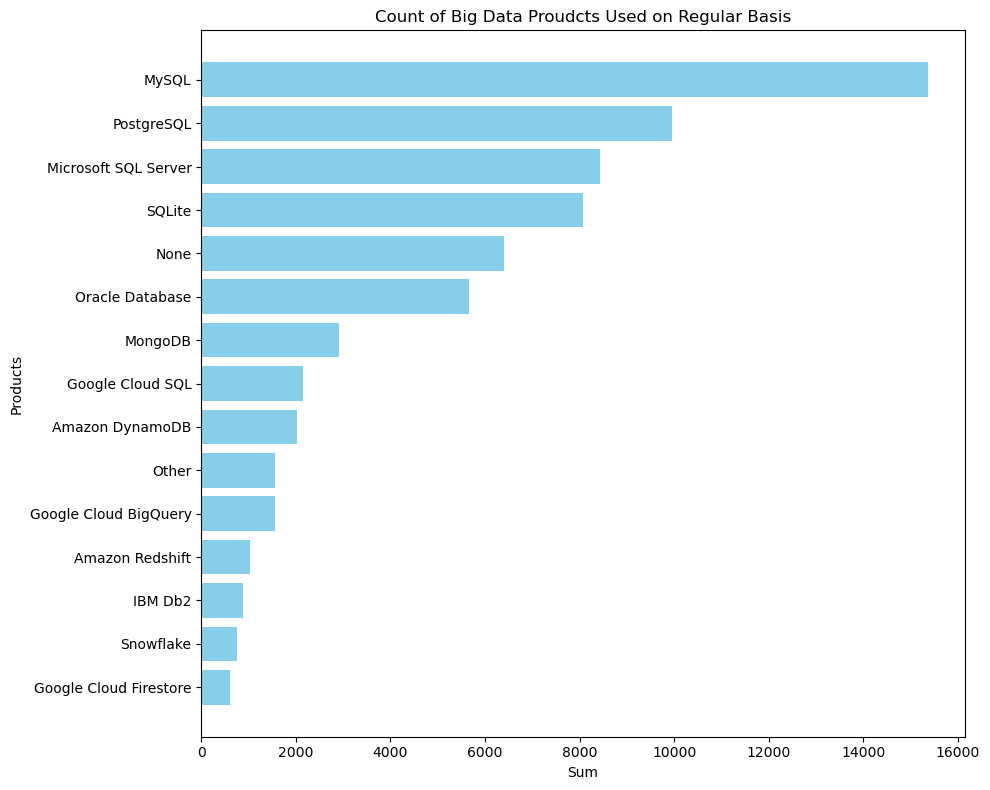

In [157]:
labels = get_choices(result[0])
sorted_data = sorted(zip(sum_rowise, labels), reverse=False)

# Unzip the sorted data
sorted_sum_rowise, sorted_labels = zip(*sorted_data)

# Create a horizontal bar plot with sorted row-wise sums
plt.figure(figsize=(10, 8))
plt.barh(sorted_labels, sorted_sum_rowise, color='skyblue')
plt.xlabel('Sum')
plt.ylabel('Products')
plt.title('Count of Big Data Proudcts Used on Regular Basis')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()